In [1]:
# imports
import pandas as pd
import numpy as np

In [2]:
# NOTE WHAT COLUMN TO INCLUDE AND WHAT NOT TO INCLUDE

C Column 
- can be 0 and less than 0, no dash
- S can be 0 CANNOT be less than 0, no dash
- T3-T5 --> can be 0, and less than 0, no dash
- T1 --> CANNOT be 0, less than 0, no dashes 
- T2 --> CANNOT be 0, less than 0, no dashes
- P --> CANNOT be 0, less than 0, no dashes

In [3]:
# read in the whole file and '-' as NA values 
data = pd.read_excel('Competition1_raw_data.xlsx', na_values=r'-')
                    #dtype={'P(IPO)': float, 'P(1Day)': float})
# define dashes as missing --> 0 or NaN
data.head(5)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


In [10]:
# replace with nan
data.loc[(data['S1'] < 0),'S1'] = np.nan
data.loc[(data['T2'] == 0),'T2'] = np.nan
data.loc[(data['T5'] < 0),'T5'] = np.nan

# drop - for P values 
data.dropna(subset=['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)'], inplace=True)

# impute 
data['S1'] = data['S1'].fillna(data['S1'].median())
data['T2'] = data['T2'].fillna(data['T2'].median())
data['T5'] = data['T5'].fillna(data['T5'].median())
data['C3_impute'] = data['C3'].fillna(data['C3'].median())
data['C7_impute'] = data['C7'].fillna(data['C7'].median())

# exclude not imputed C3 and C7
data = data[['I1', 'I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2',
       'C4', 'C5', 'C6', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3',
       'C3_impute', 'C7_impute']]

In [11]:
data.columns

Index(['I1', 'I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C4',
       'C5', 'C6', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'C3_impute',
       'C7_impute'],
      dtype='object')

In [12]:
# P's are taken care off 
# S taken care off 
# T taken care off 
# C taken care off 

In [13]:
data[data['S1']==0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,...,T1,T2,T3,T4,T5,S1,S2,S3,C3_impute,C7_impute


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 681
Data columns (total 22 columns):
I1           660 non-null object
I2           660 non-null object
I3           660 non-null object
P(IPO)       660 non-null float64
P(H)         660 non-null float64
P(L)         660 non-null float64
P(1Day)      660 non-null float64
C1           660 non-null float64
C2           660 non-null float64
C4           660 non-null float64
C5           660 non-null float64
C6           660 non-null float64
T1           660 non-null float64
T2           660 non-null float64
T3           660 non-null float64
T4           660 non-null float64
T5           660 non-null float64
S1           660 non-null float64
S2           660 non-null float64
S3           660 non-null float64
C3_impute    660 non-null float64
C7_impute    660 non-null float64
dtypes: float64(19), object(3)
memory usage: 118.6+ KB


In [15]:
data.isnull().sum()

I1           0
I2           0
I3           0
P(IPO)       0
P(H)         0
P(L)         0
P(1Day)      0
C1           0
C2           0
C4           0
C5           0
C6           0
T1           0
T2           0
T3           0
T4           0
T5           0
S1           0
S2           0
S3           0
C3_impute    0
C7_impute    0
dtype: int64

In [16]:
data[data['P(1Day)']<0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,...,T1,T2,T3,T4,T5,S1,S2,S3,C3_impute,C7_impute


In [17]:
data[data['P(1Day)']==0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,...,T1,T2,T3,T4,T5,S1,S2,S3,C3_impute,C7_impute
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.0,106.0,1.0,-0.024925,...,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0,1.49,494.008
266,GSAT,"Globalstar, Inc.",4899,17.0,18.0,16.0,0.0,108.0,1.0,-0.006352,...,759.0,18196.0,16262.0,397.0,959.0,85.0,228.0,173.0,0.23,127.147
279,HERO,"HERCULES OFFSHORE, INC.",1381,20.0,20.0,18.0,0.0,111.0,1.0,0.007191,...,494.0,12518.0,11207.0,297.0,603.0,49.0,103.0,135.0,0.00,107.462
364,MATH,SAJAN INC,3674,6.0,8.0,6.0,0.0,85.0,0.0,0.007191,...,235.0,5674.0,5085.0,132.0,284.0,27.0,66.0,63.0,-0.95,130.000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 681
Data columns (total 22 columns):
I1           660 non-null object
I2           660 non-null object
I3           660 non-null object
P(IPO)       660 non-null float64
P(H)         660 non-null float64
P(L)         660 non-null float64
P(1Day)      660 non-null float64
C1           660 non-null float64
C2           660 non-null float64
C4           660 non-null float64
C5           660 non-null float64
C6           660 non-null float64
T1           660 non-null float64
T2           660 non-null float64
T3           660 non-null float64
T4           660 non-null float64
T5           660 non-null float64
S1           660 non-null float64
S2           660 non-null float64
S3           660 non-null float64
C3_impute    660 non-null float64
C7_impute    660 non-null float64
dtypes: float64(19), object(3)
memory usage: 118.6+ KB


In [22]:
# C2 to int (booleon)
data['C2'] = data['C2'].astype(int)

# P(mid) calculation and add it to the column 
# P(mid) = (P(H)+P(L))/2
data['P(mid)'] = (data['P(H)'] + data['P(L)'])/2

# targets to be calculated
# make it equal to P(IPO) then we will just replace
#data['Y1'] = data['P(IPO)']
#data['Y2'] = data['P(IPO)']

# replace Y1 and change dtype to binary
data['Y1'] = np.where((data['P(IPO)'] < data['P(mid)']), 1, 0)
data['Y2'] = np.where((data['P(IPO)'] > data['P(mid)']), 1, 0)
#data.loc[(data['Y1'] < data['P(mid)']),'Y1'] = 1
#data.loc[(data['Y1'] > data['P(mid)']),'Y1'] = 0
#data['Y1'] = data['Y1'].astype(int)

# replace Y2
#data.loc[(data['Y2'] < data['P(1Day)']),'Y2'] = 1
#data.loc[(data['Y2'] > data['P(1Day)']),'Y2'] = 0
#data['Y2'] = data['Y2'].astype(int)

# Control values to be calculated
data['C3`'] = data['C3_impute']
data['C3`'] = np.where((data['C3_impute'] > 0),1,data['C3_impute'])
data['C3`'] = np.where((data['C3_impute'] < 0),0,data['C3_impute'])
data['C3`'] = data['C3`'].astype(int)

# C5`
data['C5`'] = data['C5']/data['C6']
data['C5`'] = data['C5`'].astype(float)

# C6`
data['C6calc'] = ((data['P(IPO)'] - data['P(mid)']) / data['P(mid)']) * 1
data['C6`'] = 0
data['C6`'] = np.where((data['P(IPO)'] > data['P(mid)']),data['C6calc'],data['C6`'])
data['C6`'] = np.where((data['P(IPO)'] < data['P(mid)']),0,data['C6`'])
data['C6`'] = np.where((data['P(mid)']==0),0,data['C6`'])
data['C6`'] = data['C6`'].astype(float)

In [23]:
#data.loc[data['T4'] == '-'] 
#data.drop(217,inplace=True)
#percent of long sentences
data["T1prime"] = data["T4"].astype(float)/data["T1"].astype(float)
#percent of real words
data["T3prime"] = data["T3"].astype(float)/data["T2"].astype(float)
#percent of long words
data["T4prime"] = data["T5"].astype(float)/data["T2"].astype(float)
#percent of positive words
data["S1prime"] = data["S1"].astype(float)/data["T2"].astype(float)
#percent of negative words
data["S2prime"] = data["S2"].astype(float)/data["T2"].astype(float)
#percent of uncertain words
data["S3prime"] = data["S2"].astype(float)/data["T2"].astype(float)

In [24]:
data.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,...,C3`,C5`,C6calc,C6`,T1prime,T3prime,T4prime,S1prime,S2prime,S3prime
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1,0.029074,...,3,3.864345,0.111111,0.111111,0.640426,0.908876,0.054250,0.004875,0.009199,0.009199
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0,-0.013352,...,0,12.028832,-0.111111,0.000000,0.644753,0.898724,0.051395,0.003258,0.011105,0.011105
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1,0.020715,...,0,3.369134,-0.461538,0.000000,0.636816,0.909350,0.061764,0.011593,0.006271,0.006271
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1,0.020023,...,0,3.299697,-0.233333,0.000000,0.539634,0.917060,0.061630,0.009686,0.007144,0.007144
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1,-0.034895,...,0,3.726269,0.050000,0.050000,0.587413,0.888469,0.048550,0.004518,0.010047,0.010047


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 681
Data columns (total 35 columns):
I1           660 non-null object
I2           660 non-null object
I3           660 non-null object
P(IPO)       660 non-null float64
P(H)         660 non-null float64
P(L)         660 non-null float64
P(1Day)      660 non-null float64
C1           660 non-null float64
C2           660 non-null int64
C4           660 non-null float64
C5           660 non-null float64
C6           660 non-null float64
T1           660 non-null float64
T2           660 non-null float64
T3           660 non-null float64
T4           660 non-null float64
T5           660 non-null float64
S1           660 non-null float64
S2           660 non-null float64
S3           660 non-null float64
C3_impute    660 non-null float64
C7_impute    660 non-null float64
P(mid)       660 non-null float64
Y1           660 non-null int64
Y2           660 non-null int64
C3`          660 non-null int64
C5`          660 non-n

In [34]:
# exclude C6Calc and put Y1, Y2 at the end 
data = data[['I1', 'I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C4',
       'C5', 'C6', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'C3_impute',
       'C7_impute', 'C3`', 'C5`', 'C6`',
       'T1prime', 'T3prime', 'T4prime', 'S1prime', 'S2prime', 'S3prime','Y1', 'Y2']]

In [35]:
data.columns

Index(['I1', 'I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C4',
       'C5', 'C6', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'C3_impute',
       'C7_impute', 'C3`', 'C5`', 'C6`', 'T1prime', 'T3prime', 'T4prime',
       'S1prime', 'S2prime', 'S3prime', 'Y1', 'Y2'],
      dtype='object')

In [36]:
#data['C2'] = data['C2'].astype(int)
#data['I3'] = data['I3'].astype(str)
# changing to correct type --> to continous 
#cols = ['P(IPO)','P(H)','P(L)','P(1Day)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']
#data[cols] = data[cols].astype(float)
#data.info()

In [37]:
data.to_csv('omg2.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5fc7a8eb8>,
      dtype=object)

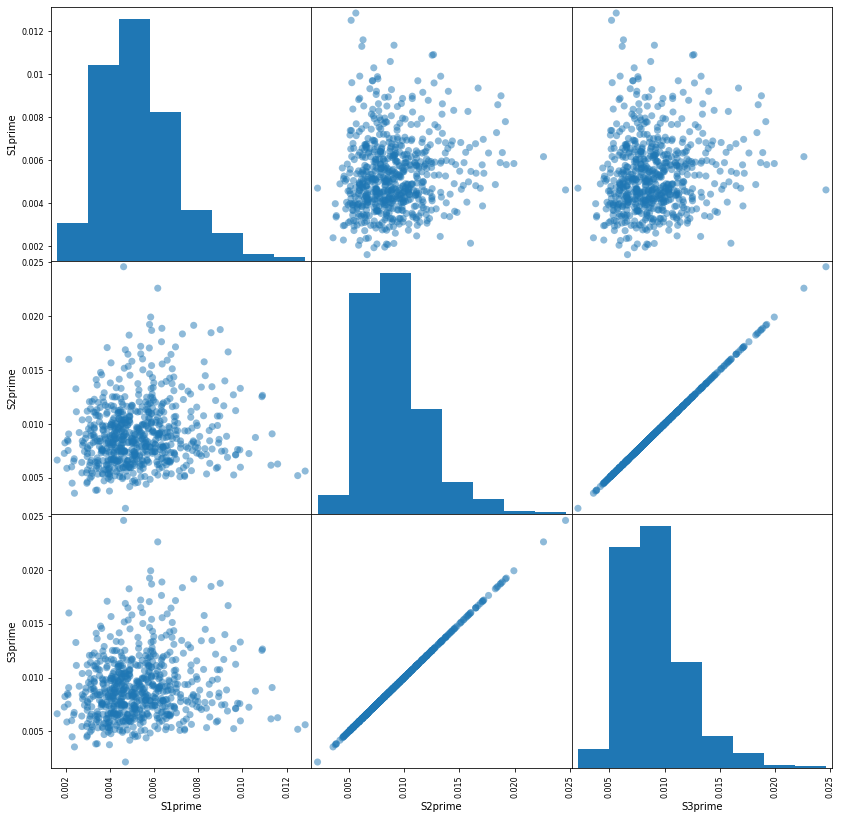

In [38]:
pd.plotting.scatter_matrix(data[['S1prime', 'S2prime', 'S3prime']], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50)